In [2]:
import requests
import json
import time
import pandas as pd
import matplotlib.patches as patches
import urllib, cStringIO
from PIL import Image
import itertools
from IPython.display import HTML, display_html, YouTubeVideo
import warnings
import datetime

warnings.filterwarnings('ignore')

%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


give my app access to obtain photos - run https://oauth.vk.com/authorize?client_id=5578186&scope=photos&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.0&response_type=token (you can register your own desktop app in VK at https://vk.com/apps?act=manage and change client_id)

In [3]:
# paste your keys here
access_token = 'b54a4dfe5ae5ceb9225a2bc8b4316ec39f876b5eca564ee78c8e45f889c10b3b37b6e619faba6186e7412'

user_id = 1944346
album_id = 233315200 # e.g. '221549386' for https://vk.com/album17149186_221549386, if None than load photos on which user tagged

In [4]:
photo_links = []
photo_dates = []

vk_api = 'https://api.vk.com/method/'

if album_id is not None:
    resp = requests.get(vk_api + 'photos.get?uid=%s&access_token=%s&aid=%s'% (user_id, access_token, album_id))
    photos_json = json.loads(resp.content)
    for photo in photos_json['response']:
        photo_links.append(photo['src_big'])
        photo_dates.append(photo['created'])
else:
    resp = requests.get(vk_api + 'photos.getUserPhotos?user_id=%s&access_token=%s&count=100'% (user_id, access_token))
    photos_json = json.loads(resp.content)
    offset = 0
    while resp.status_code == 200 and len(photo_links) < photos_json['response'][0]:
        offset += 100
        for photo in photos_json['response'][1:]:
            photo_links.append(photo['src_big'])
        resp = requests.get('https://api.vk.com/method/photos.getUserPhotos?\
                            user_id=%s&access_token=%s&count=100&offset=%s'% (user_id, access_token, offset))
        photos_json = json.loads(resp.content)
        
print 'Photos loaded: {}'.format(len(photo_links))

Photos loaded: 10


In [5]:
def get_photo(link):
    file = cStringIO.StringIO(urllib.urlopen(link).read())
    img = Image.open(file)
    return img

def show_photo(link, ax):
    img = get_photo(link)
    im = ax.imshow(img, aspect='equal')
    ax.axis('off')
    return im

In [6]:
def plot_face(index, photo_links, photo_dates, prefix, figsize=[5,5]):
    fig = plt.figure(figsize = figsize)
    ax2 = plt.gca()
    im = get_photo(photo_links[index])
    imarray = numpy.asarray(im)
    ysize, xsize, _ = imarray.shape   
    yminsize, xminsize = ysize/4., xsize/4.
    
    top = np.random.randint(ysize-yminsize)
    left = np.random.randint(xsize-xminsize) 
    height = max(yminsize, np.random.randint(ysize-top))
    width = max(xminsize, np.random.randint(xsize-left))
    
    rect = {'top' : top,
           'height' : height,
           'width' : width,
           'left' : left}
    face = imarray[rect['top']:(rect['top']+rect['height']), rect['left']:(rect['left']+rect['width']), :]
    ax2.imshow(face, aspect='equal')
    ax2.axis('off')
    
    date = datetime.datetime.fromtimestamp(int(photo_dates[index])).strftime('%Y-%m-%d %H:%M:%S')
#     ax2.set_title(date)
    
    display_html(HTML(u'<a href="#answer%s%s" class="btn btn-default" data-toggle="collapse">Показать ответ</a>\
        <div id="answer%s%s" class="collapse">\
        <b>%s</b>\
        <img src="%s"/>\
        </div>' % (prefix, index, prefix, index, date, photo_links[index])))
    plt.show()

In [7]:
photo_links2 = []
photo_dates2 = []

album_id = None
# album_id=175349029

vk_api = 'https://api.vk.com/method/'

if album_id is not None:
    resp = requests.get(vk_api + 'photos.get?uid=%s&access_token=%s&aid=%s'% (user_id, access_token, album_id))
    photos_json = json.loads(resp.content)
    for photo in photos_json['response']:
        photo_links2.append(photo['src_big'])
        photo_dates2.append(photo['created'])
else:
    resp = requests.get(vk_api + 'photos.getUserPhotos?user_id=%s&access_token=%s&count=100'% (user_id, access_token))
    photos_json = json.loads(resp.content)
    offset = 0
    while resp.status_code == 200 and len(photo_links2) < photos_json['response'][0]:
        print offset
        time.sleep(1)
        offset += 100
        for photo in photos_json['response'][1:]:
#             print photo['src_big']
            photo_links2.append(photo['src_big'])
            photo_dates2.append(photo['created'])
#         print 'https://api.vk.com/method/photos.getUserPhotos?\
#                             user_id=%s&access_token=%s&count=100&offset=%s'% (user_id, access_token, offset)
        resp = requests.get('https://api.vk.com/method/photos.getUserPhotos?user_id=%s&access_token=%s&count=100&offset=%s'
                            % (user_id, access_token, offset))
        photos_json = json.loads(resp.content)
        
print 'Photos loaded: {}'.format(len(photo_links2))

0
100
200
300
400
Photos loaded: 423


<center><h1> Даша! <h1>
 Поздравляю тебя с Днем Рождения!
 
<img src="title.png" width="500"/>
</center>

<div class="alert alert-success">
    <b>Я тебя очень-очень люблю!<b><br>
    <img src="https://media4.giphy.com/media/B92SbIu6JCGVG/200w.gif"/>
    
    Ты 
</div>

красивая, 

<img src="buty1.jpg" height="300" width="300"/>

талантливая, 

<img src="talant.jpg" height="300" width="500"/>

живая и жизнерадостная,

<img src="zhizn.jpg" height="300" width="500"/>

просто секс, 

<img src="sex.jpg" height="300" width="300"/>

страстная,

<img src="strast.jpg" height="300" width="300"/>

умная,

<img src="smart.jpg" height="300" width="300"/>

спортивная,

<img src="sport.jpg" height="300" width="300"/>

иногда странная,

<img src="strange.jpg" height="300" width="300"/>

но такая вдохновляющая,

<img src="art.jpg" height="300" width="300"/>

девушка-загадка ...

<img src="zagadka.jpg" height="300" width="300"/>

... и Королева! 

<img src="qeen1.jpg" height="300" width="300"/>

И много-много что еще

<span style="font-size:0.5em"> заботливая, привлекательная, добрая, нежная, милая, очаровательная, обворожительная, неповторимая, неописуемая, незабываемая, неотразимая, шикарная, ослепительная, страстная, недоступная, божественная, завораживающая, лучезарная, яркая , пушистая, обалденная, сногсшибательная, стройная, обольстительная, кокетливая, утончённая, грациозная, весёлая, энергичная, креативная, стильная, коммуникабельная, тактичная, романтичная ...</span>

<span style="font-size:0.5em">...разносторонняя, сказочная, симпатичная, пылкая, единственная, ласковая, сладенькая, умопомрачительная, желанная, непредсказуемая, цветущая, безупречная, гармоничная, отзывчивая, совершенная, лучшая, скромная, изысканная, шаловливая, отпадная, искренняя, дружелюбная, понимающая, экстравагантная, мечтательная, ароматная, искромётная, чистолюбивая, манящая, восторженная, бескорыстная, соблазнительная, одурманивающая, жизнерадостная, прелестная, улыбчивая...</span>

<span style="font-size:0.5em">...зажигательная, честная, возбуждающая, чистосердечная, игривая, обаятельная, непредсказуемая, целеустремлённая, дивная, женственная, бесподобная, лучезарная, ненаглядная, необходимая, изумительная, сказочная, трогательная, любимая, самая-самая!</span>

Ах да, еще юмор :Р

<table>
  <tr>
    <td><img src="humor/1.jpg"/></td>
    <td><img src="humor/2.jpg"/></td>
    <td><img src="humor/3.jpg"/></td>
    <td><img src="humor/4.jpg"/></td>
  </tr>
    <tr>
    <td><img src="humor/5.jpg"/></td>
    <td><img src="humor/6.jpg"/></td>
    <td><img src="humor/7.jpg"/></td>
    <td><img src="humor/8.jpg"/></td>
  </tr>
</table>

<h3>Еще тебя очень любят</h3>

---
<a href="#answer" class="btn btn-default" data-toggle="collapse">Показать кто</a>
<div id="answer" class="collapse in">
<table>
  <tr>
    <td><img src="https://vk.com/images/stickers/68/128.png"/></td>
    <td><img src="https://vk.com/images/stickers/68/128.png"/></td>
    <td><img src="https://vk.com/images/stickers/68/128.png"/></td>
    <td><img src="https://vk.com/images/stickers/68/128.png"/></td>
  </tr>
</table>
</div>

<center>А один так вообще 

---
<a href="#answer2" class="btn btn-default" data-toggle="collapse">не может устоять перед твоим обаянием</a>
<div id="answer2" class="collapse in">

<img src="https://media4.giphy.com/media/iU2yJX5YKI9pe/200w.gif" />


</div>
</center>



<i>А помнишь все наши совместные фотографии?<br>

А помнишь как я сделал игру в подарок, а ты завидовала?</i>

Ну я не мог оставить и тебя на др без игры! Проверим, помнишь ли ты)

Показать ответ 2016-06-18 21:36:03

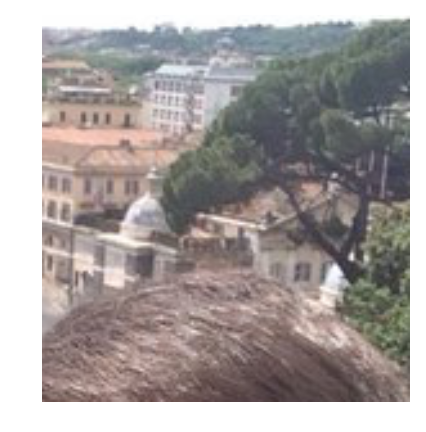

In [23]:
plot_face(0, photo_links, photo_dates, 'we')

Я тебе желаю огромный

<img src="happy1.png"/>

огромный

<img src="happy2.png"/>

огромный-преогромный

<img src="happy3.png"/>

кусок мохнатого счастья!

<img src="happy4.png"/>

<center>
И чтобы все-все было хорошо, все мечты сбывались бы, все ладилось, ты не болела, радовалась и радовала, не грустила,  высыпалась, вкусно и сытно кушала, купалась в море, любила и наслаждалась бы тем, что я тебя люблю.


<img src="title2.png" width="500"/>
</center>

<center><h2>C Днем Рождения, любимая!<h2></center>

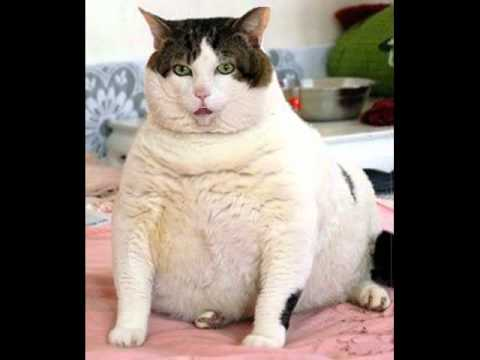

In [9]:
YouTubeVideo('U4jfkfmcQ9s')

P.S. Продолжение игры, новый уровень сложности - фотографии с тобой (>400 штук!):

Показать ответ 2013-02-18 23:59:35

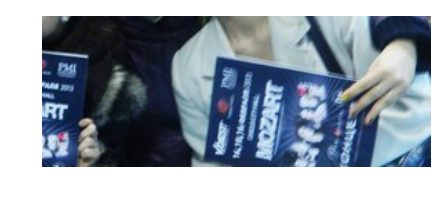

In [10]:
plot_face(np.random.randint(len(photo_links2)), photo_links2, photo_dates2, 'you')